In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline

In [63]:
from google.colab import files
Ufiles=files.upload()

Saving indeks-standar-pencemar-udara-di-spku-dataset.xlsx to indeks-standar-pencemar-udara-di-spku-dataset.xlsx


In [100]:
df=pd.read_excel('indeks-standar-pencemar-udara-di-spku-dataset.xlsx')

In [271]:
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,tahun
0,2020-01-01 00:00:00,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK,2020-01-01
1,2020-01-02 00:00:00,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK,2020-01-02
2,2020-01-03 00:00:00,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK,2020-01-03
3,2020-01-04 00:00:00,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK,2020-01-04
4,2020-01-05 00:00:00,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK,2020-01-05


In [102]:
df['categori'].value_counts()

SEDANG         1183
BAIK            349
TIDAK SEHAT     130
Name: categori, dtype: int64

In [68]:
#drop useless values
df.drop(["tanggal"],axis=1,inplace=True)
df.drop(["stasiun"],axis=1,inplace=True)
pd.set_option("display.max_columns", None)

KeyError: "['tanggal'] not found in axis"

In [103]:
#drop any rows that have 7 in the rebounds column
df = df[df.pm10 != "---"]
df = df[df.so2 != "---"]
df = df[df.o3 != "---"]
df = df[df.co != "---"]
df = df[df.no2 != "---"]
df = df[df.critical != "---"]
df = df[df.categori != "---"]
df.dropna(subset = ["critical"], inplace=True)
df.dropna(subset = ["max"], inplace=True)
df= df[df['max'] != 0]

df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01 00:00:00,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02 00:00:00,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03 00:00:00,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04 00:00:00,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05 00:00:00,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
1654,2020-12-24 00:00:00,DKI5 (Kebon Jeruk) Jakarta Barat,29,31,9,28,2,31.0,PM25,BAIK
1655,2020-12-25 00:00:00,DKI5 (Kebon Jeruk) Jakarta Barat,24,27,7,18,3,27.0,PM25,BAIK
1658,2020-12-28 00:00:00,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35.0,CO,BAIK
1660,2020-12-30 00:00:00,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21.0,CO,BAIK


In [104]:
#check if there's Na value
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [105]:
#visualize the data frame
df.head(500)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01 00:00:00,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02 00:00:00,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03 00:00:00,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04 00:00:00,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05 00:00:00,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
561,2020-05-21 00:00:00,DKI4 (Lubang Buaya),25,22,9,52,4,52.0,O3,SEDANG
562,2020-05-22 00:00:00,DKI4 (Lubang Buaya),70,22,15,59,4,70.0,PM10,SEDANG
563,2020-05-23 00:00:00,DKI4 (Lubang Buaya),38,22,9,43,3,43.0,O3,BAIK
564,2020-05-24 00:00:00,DKI4 (Lubang Buaya),62,21,25,28,4,62.0,PM10,SEDANG


In [106]:
df['categori'].unique()

array(['BAIK', 'SEDANG', 'TIDAK SEHAT'], dtype=object)

# visualize the data

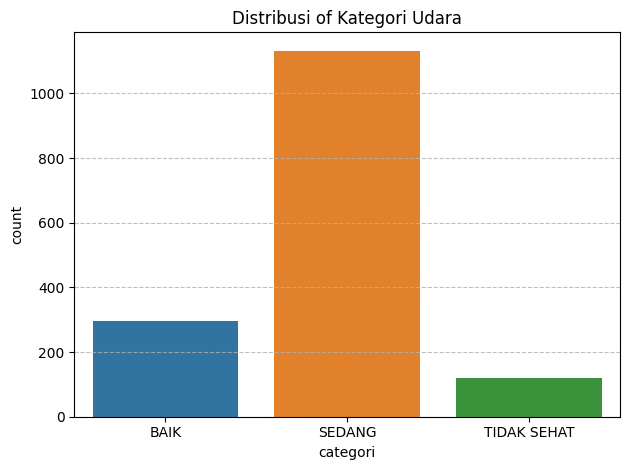

In [107]:
plt.figure(facecolor='white')
sns.countplot(x=df["categori"],label="air categori")
plt.title('Distribusi of Kategori Udara')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [108]:
data = df.copy()

In [124]:
data['tahun'] = pd.to_datetime(data['tanggal'])


<ipython-input-124-36c0f24fcac2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['tahun'] = pd.to_datetime(data['tanggal'])


In [125]:
data.dtypes

tanggal             object
stasiun             object
pm10                object
so2                 object
co                  object
o3                  object
no2                 object
max                float64
critical            object
categori            object
tahun       datetime64[ns]
dtype: object

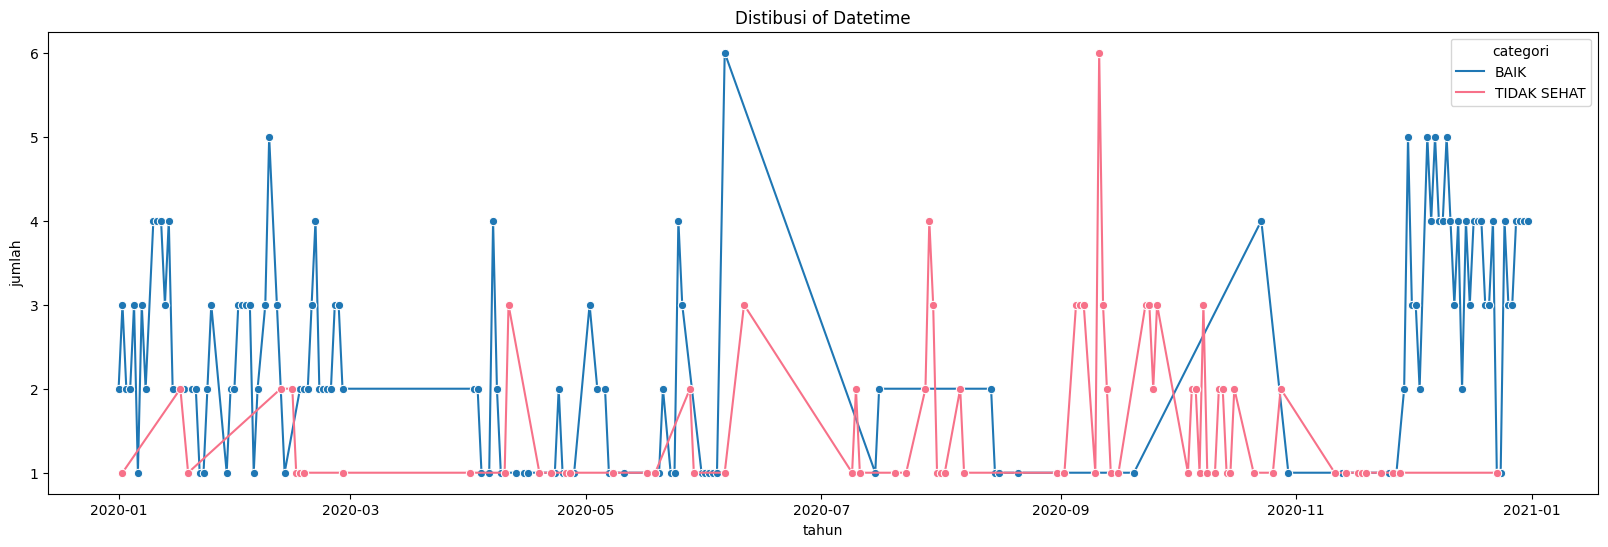

In [175]:
tahun = data.groupby(['tahun'])['categori'].value_counts().rename('jumlah').reset_index()
baik=tahun[tahun['categori']=='BAIK']
tidak_baik=tahun[tahun['categori']=='TIDAK SEHAT']

plt.figure(figsize=(20,6))
sns.lineplot(data=baik, x='tahun', y='jumlah', hue='categori', marker='o', color='blue')
sns.lineplot(data=tidak_baik, x='tahun', y='jumlah', hue='categori', marker='o',palette='husl')
plt.title('Distibusi of Datetime')
plt.show()

In [74]:
stasiun=data.groupby(['stasiun'])['categori'].value_counts().rename('Jumlah').reset_index()
stasiun

,stasiun,categori,Jumlah
0,DKI1 (Bunderan HI),SEDANG,215
1,DKI1 (Bunderan HI),BAIK,104
2,DKI1 (Bunderan HI),TIDAK SEHAT,4
3,DKI2 (Kelapa Gading),SEDANG,232
4,DKI2 (Kelapa Gading),BAIK,64
5,DKI2 (Kelapa Gading),TIDAK SEHAT,28
6,DKI3 (Jagakarsa),SEDANG,236
7,DKI3 (Jagakarsa),BAIK,35
8,DKI3 (Jagakarsa),TIDAK SEHAT,27
9,DKI4 (Lubang Buaya),SEDANG,242


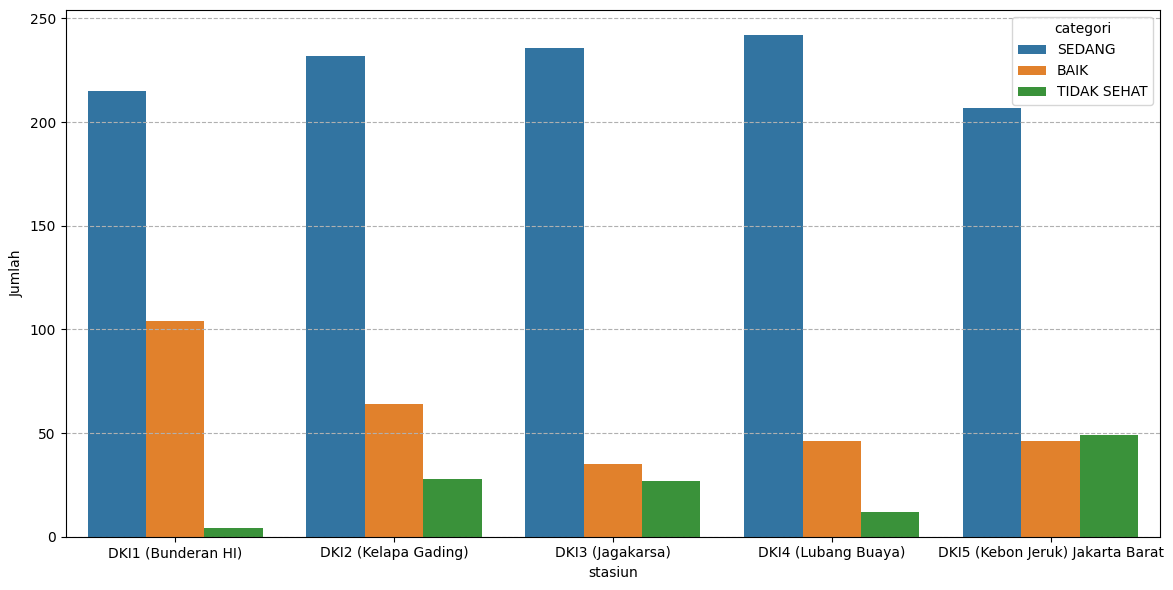

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(data=stasiun, x='stasiun',y='Jumlah', hue='categori')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

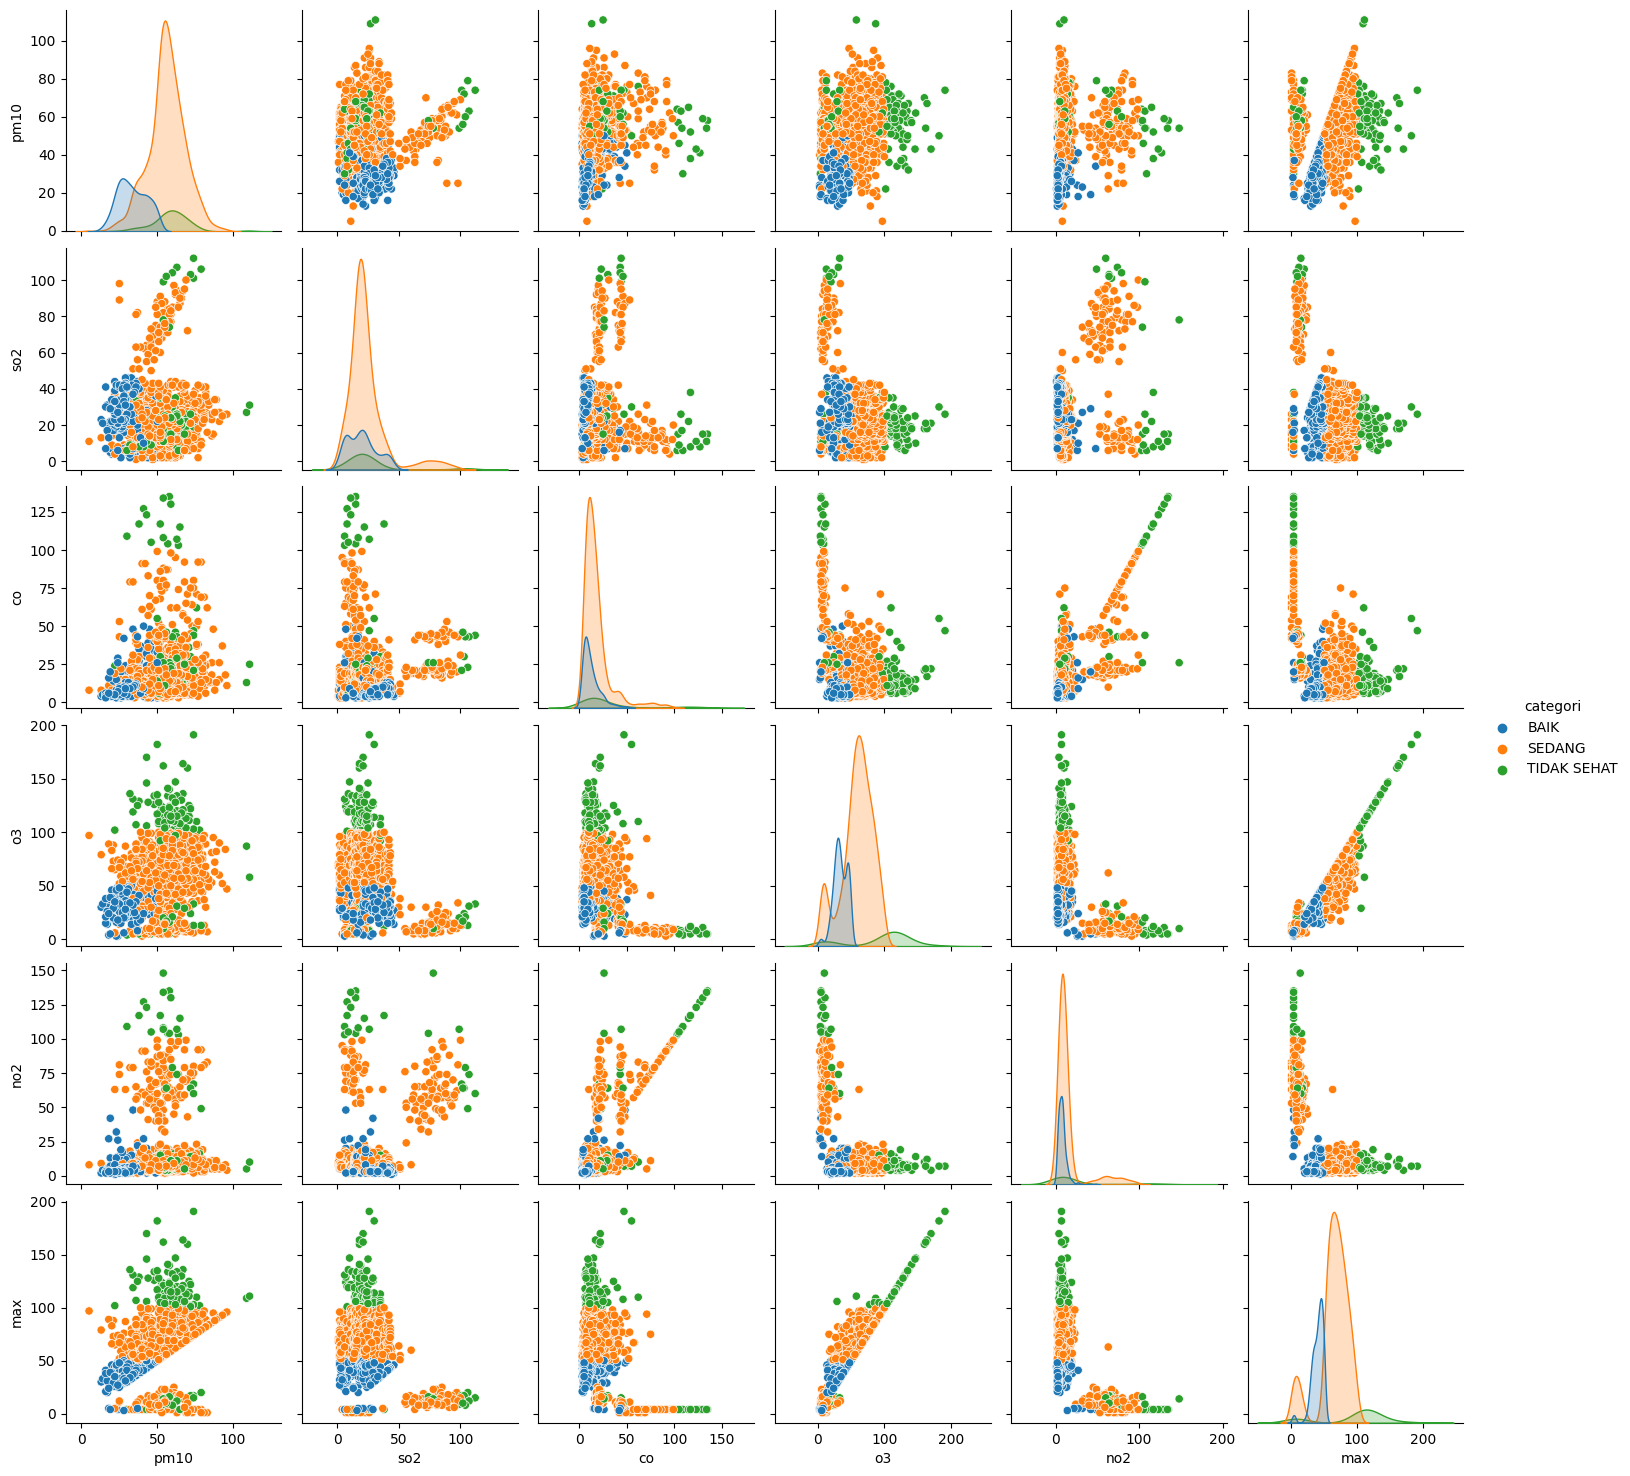

In [84]:
sns.pairplot(data, hue='categori')

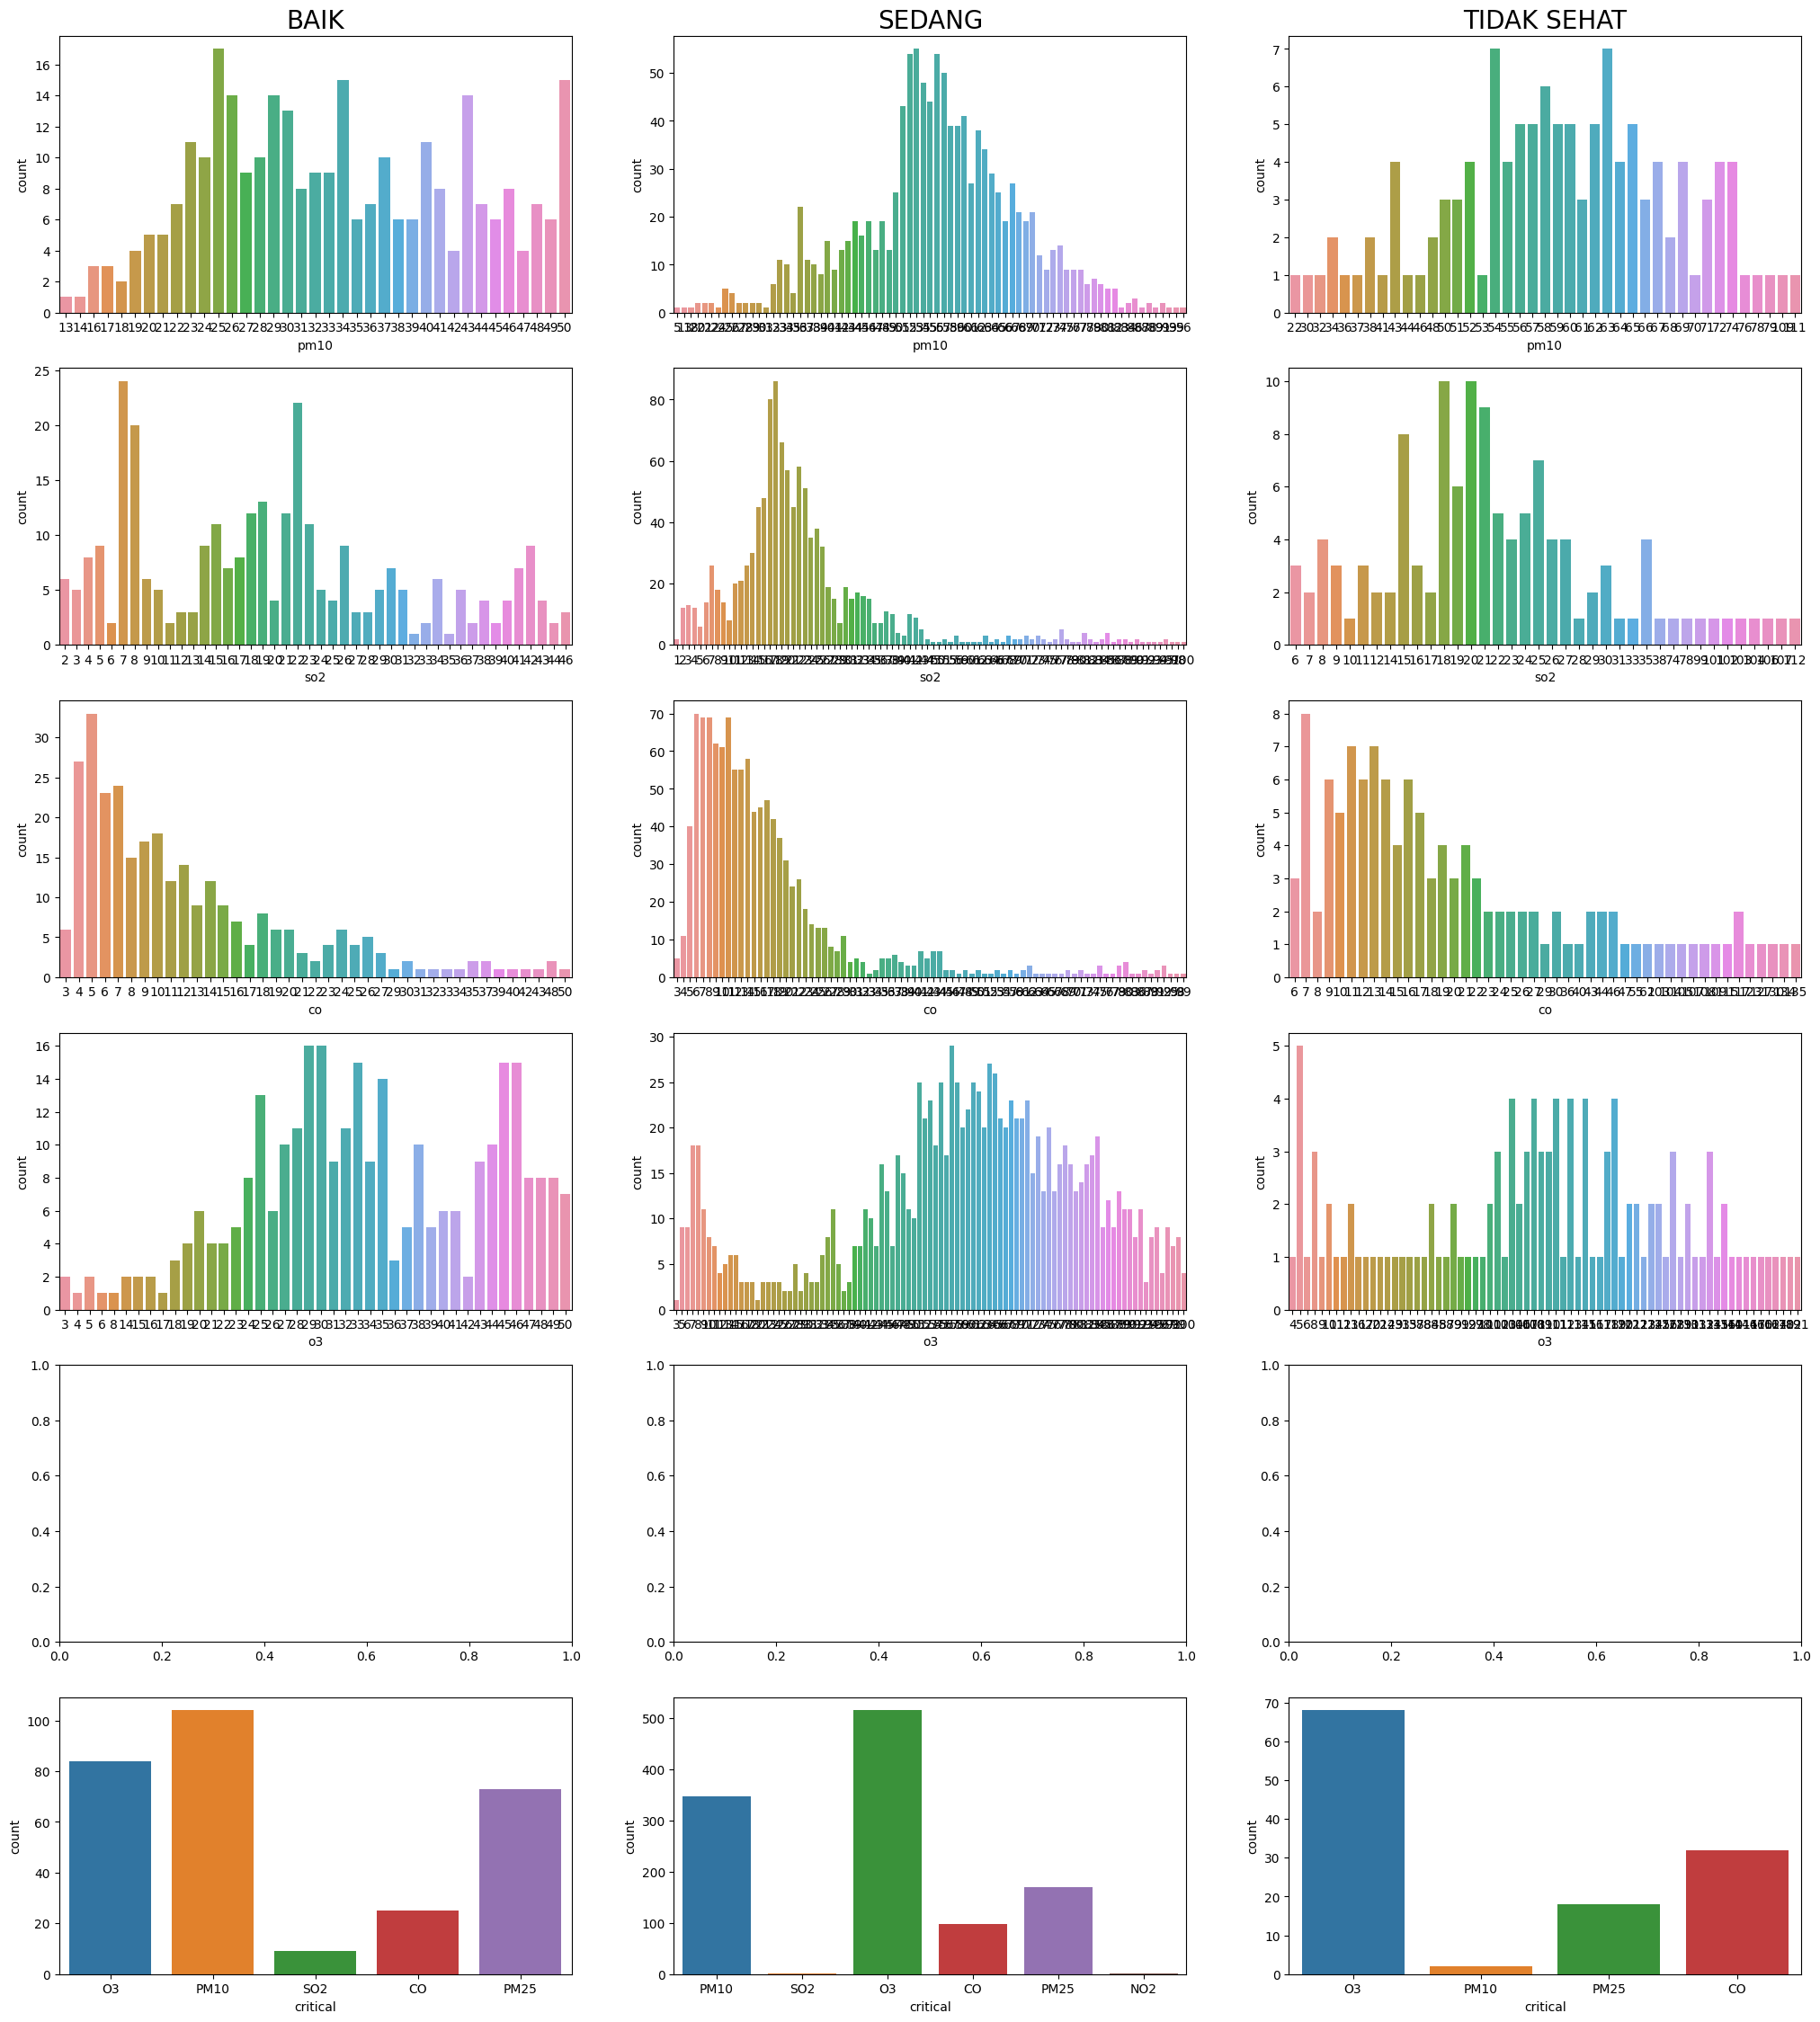

In [83]:
# creating charts
cols = ['BAIK','SEDANG','TIDAK SEHAT']
var_to_plot = ["pm10","so2","co","o3","max","critical"]
types = data[var_to_plot].dtypes

colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=len(var_to_plot), ncols=3, figsize=(25,28))
fig.set_facecolor('white')

for i,var in enumerate(zip(var_to_plot,types)):

    if var[1] =='O':

        sns.countplot(x=data.loc[data['categori'] == 'BAIK'][var[0]],label=var[0],ax=ax[i,0])
        sns.countplot(x=data.loc[data['categori'] == 'SEDANG'][var[0]],label=var[0],ax=ax[i,1])
        sns.countplot(x=data.loc[data['categori'] == 'TIDAK SEHAT'][var[0]],label=var[0],ax=ax[i,2])

for ax, col in zip(ax[0], cols):
    ax.set_title(col,fontdict={'fontsize':20})

plt.show()

# data pre-processing

In [276]:
dff=data.copy()

In [280]:
dff  =dff.drop(['tanggal', 'stasiun', 'tahun'], axis=1)

In [281]:

dff.dropna(subset = ["o3"], inplace=True)
dff.dropna(subset = ["no2"], inplace=True)
dff.dropna(subset = ["max"], inplace=True)
dff.dropna(subset = ["critical"], inplace=True)
dff.dropna(subset = ["categori"], inplace=True)

In [282]:
dff

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,O3,BAIK
1,27,22,12,29,8,29.0,O3,BAIK
2,39,22,14,32,10,39.0,PM10,BAIK
3,34,22,14,38,10,38.0,O3,BAIK
4,35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
1654,29,31,9,28,2,31.0,PM25,BAIK
1655,24,27,7,18,3,27.0,PM25,BAIK
1658,22,33,5,35,3,35.0,CO,BAIK
1660,16,7,3,21,2,21.0,CO,BAIK


In [283]:
#turn binary attributes into 0 and 1
dff['categori']=dff['categori'].map({'BAIK': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3})
dff['critical']=dff['critical'].map({'O3': 1, 'PM10': 2, 'SO2': 3,'PM25':4,'CO':5})


In [284]:
dff

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,1.0,1
1,27,22,12,29,8,29.0,1.0,1
2,39,22,14,32,10,39.0,2.0,1
3,34,22,14,38,10,38.0,1.0,1
4,35,22,12,31,9,35.0,2.0,1
...,...,...,...,...,...,...,...,...
1654,29,31,9,28,2,31.0,4.0,1
1655,24,27,7,18,3,27.0,4.0,1
1658,22,33,5,35,3,35.0,5.0,1
1660,16,7,3,21,2,21.0,5.0,1


In [285]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = ["critical"]
num_att = ["pm10","so2","co","o3","no2","max"]


# encode all the categorial features
transformer = ColumnTransformer([
    ("num_attrs", StandardScaler(), num_att),
    ("cat_attrs", OneHotEncoder(), cat_att)]
)

In [286]:
dff.isnull().values.any()

import numpy as np

dff = dff.replace([np.inf, -np.inf], np.nan)
dff = dff.dropna()
dff = dff.reset_index()

dff = dff.dropna(axis=1)



In [287]:
dff

,index,pm10,so2,co,o3,no2,max,critical,categori
0,0,30,20,10,32,9,32.0,1.0,1
1,1,27,22,12,29,8,29.0,1.0,1
2,2,39,22,14,32,10,39.0,2.0,1
3,3,34,22,14,38,10,38.0,1.0,1
4,4,35,22,12,31,9,35.0,2.0,1
...,...,...,...,...,...,...,...,...,...
1541,1654,29,31,9,28,2,31.0,4.0,1
1542,1655,24,27,7,18,3,27.0,4.0,1
1543,1658,22,33,5,35,3,35.0,5.0,1
1544,1660,16,7,3,21,2,21.0,5.0,1


In [235]:
df =df.drop(['level_0','tanggal','stasiun'], axis=1).reset_index()


KeyError: "['level_0', 'tanggal', 'stasiun'] not found in axis"

In [249]:
df =df.drop(['index'], axis=1)


In [269]:
df

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,1.0,1
1,27,22,12,29,8,29.0,1.0,1
2,39,22,14,32,10,39.0,2.0,1
3,34,22,14,38,10,38.0,1.0,1
4,35,22,12,31,9,35.0,2.0,1
...,...,...,...,...,...,...,...,...
1541,29,31,9,28,2,31.0,4.0,1
1542,24,27,7,18,3,27.0,4.0,1
1543,22,33,5,35,3,35.0,5.0,1
1544,16,7,3,21,2,21.0,5.0,1


In [363]:
dff =dff.drop(['index'],axis=1)

In [364]:
from sklearn.model_selection import train_test_split

X = dff.drop('categori', axis=1)
y = dff.categori

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

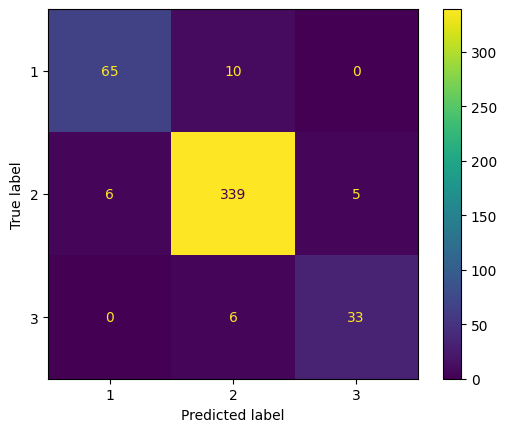

In [365]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# class_names = "Air Quality"
classifier = SVC(kernel="linear", C=0.01).fit(X_train, y_train)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

In [366]:
from sklearn.metrics import classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.47%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy    macro avg  \
precision    0.947115    0.960957   0.912500  0.954713     0.940191   
recall       0.895455    0.976953   0.901235  0.954713     0.924547   
f1-score     0.920561    0.968889   0.906832  0.954713     0.932094   
support    220.000000  781.000000  81.000000  0.954713  1082.000000   

           weighted avg  
precision      0.954515  
recall         0.954713  
f1-score       0.954417  
support     1082.000000  
_______________________________________________
Confusion Matrix: 
 [[197  23   0]
 [ 11 763   7]
 [  0   8  73]]

Test Result:
Accuracy Score: 94.18%
_______________________________________________
CLASSIFICATION REPORT:
                   1           2          3  accuracy   macro avg  \
precision   0.915493    0.954930   0.868421   0.94181    0.912948   
recall      0.866667    0.968571   0.846154   

In [211]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [367]:
import pickle
# Save the trained model to a file using pickle
with open('svm_model3.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

In [368]:
import pandas as pd

data_baru = {'pm10': 30, 'so2': 22, 'co': 10, 'o3': 22, 'no2': 11, 'max': 29, 'critical':'CO' }

# Convert the dictionary to a Pandas DataFrame
datanew = pd.DataFrame([data_baru])

# Display the DataFrame



In [369]:
#turn binary attributes into 0 and 1

datanew['critical']=datanew['critical'].map({'O3': 1, 'PM10': 2, 'SO2': 3,'PM25':4,'CO':5})




In [370]:
datanew


,pm10,so2,co,o3,no2,max,critical
0,30,22,10,22,11,29,5


In [371]:
classifier.fit(X_train, y_train)


SVC(C=0.01, kernel='linear')

In [372]:
# Assuming 'new' is your new dataset in the form of a Pandas DataFrame
# Make sure that the features in 'new' match the features used during training
new_predictions = classifier.predict(datanew)

new_predictions


array([1])